<a href="https://colab.research.google.com/github/Wang-Ruhua/DailyMacro/blob/main/Supervised_Classification_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Classification Analysis Project - Bank Churn

## Contents


* [Part 1: Exploratory Data Exploration](#Part-1:Exploratory-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training](#Part-3:-Model-Training)
* [Part 4: Result Evaluation](#Part-3:-Result-Evaluation)

# Part 0: Setup PyDrive

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive2

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = "1qqEYxJg2upQWIXkcyQPoRtdmvKHCSg5w"

file = drive.CreateFile({'id':id})
file.GetContentFile('bank_churn_data.csv')

# Part 1: Exploratory Data Exploration

### Part 1.1: Explore the dataset

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('bank_churn_data.csv')
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Check duplications
duplicated_rows = df.duplicated()
num_duplicated = len(df[duplicated_rows])
print(f"Number of duplicated rows is: {num_duplicated}")

Number of duplicated rows is: 0


### Part 1.2: Explore the features

In [ ]:
# Check unique values for each column
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
# Check missing values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Explore numerical features
# Statistics of numerical features
df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

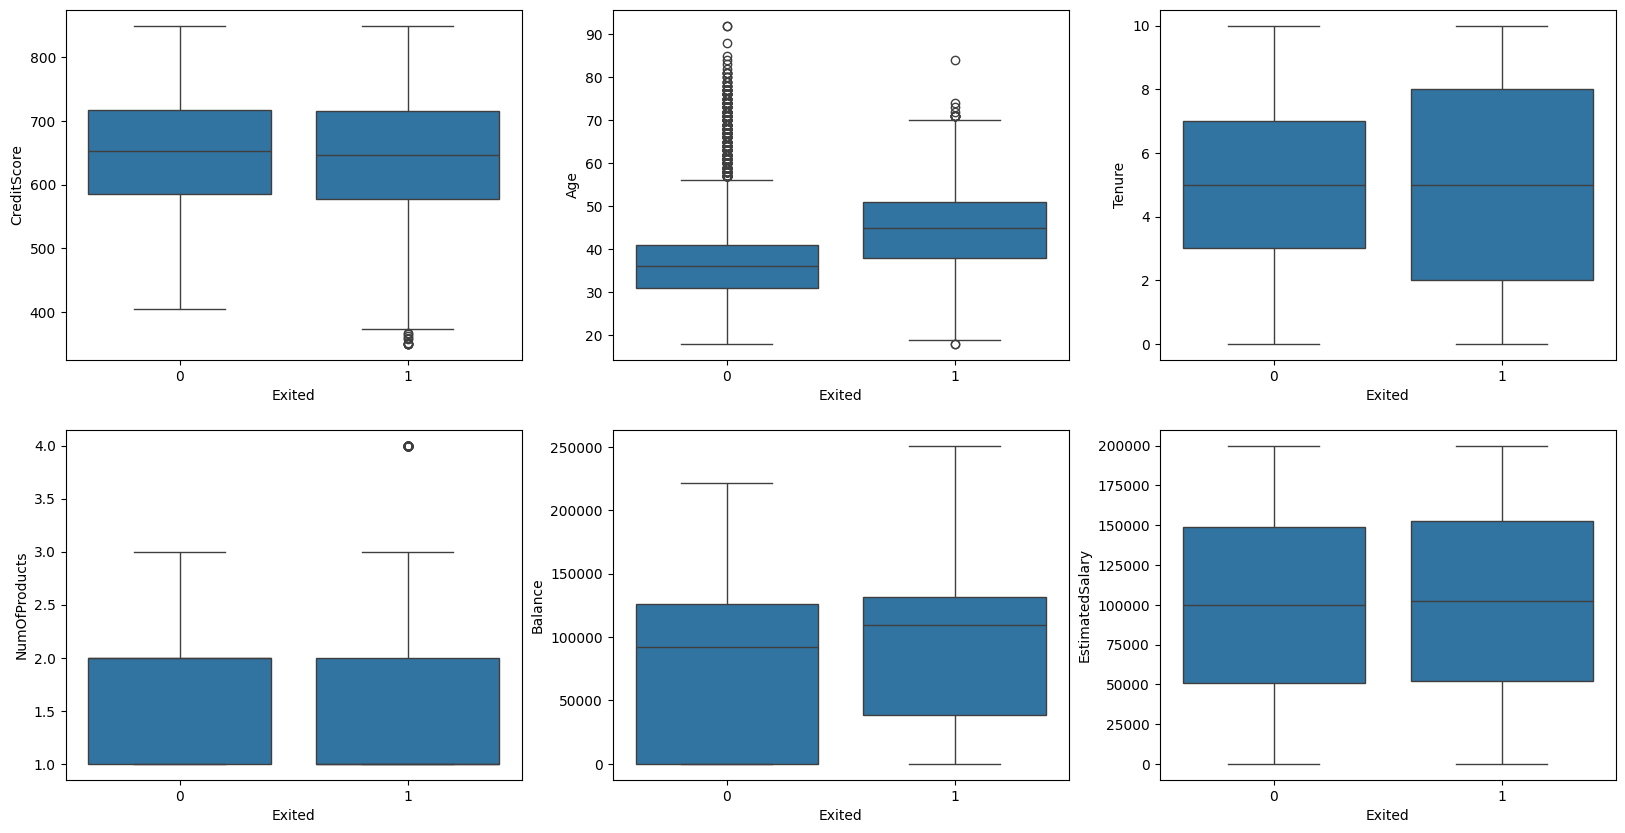

In [ ]:
# Explore numerical features
# Boxplot for numerical features
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=df, ax=axss[1][2])

<Axes: xlabel='Exited', ylabel='count'>

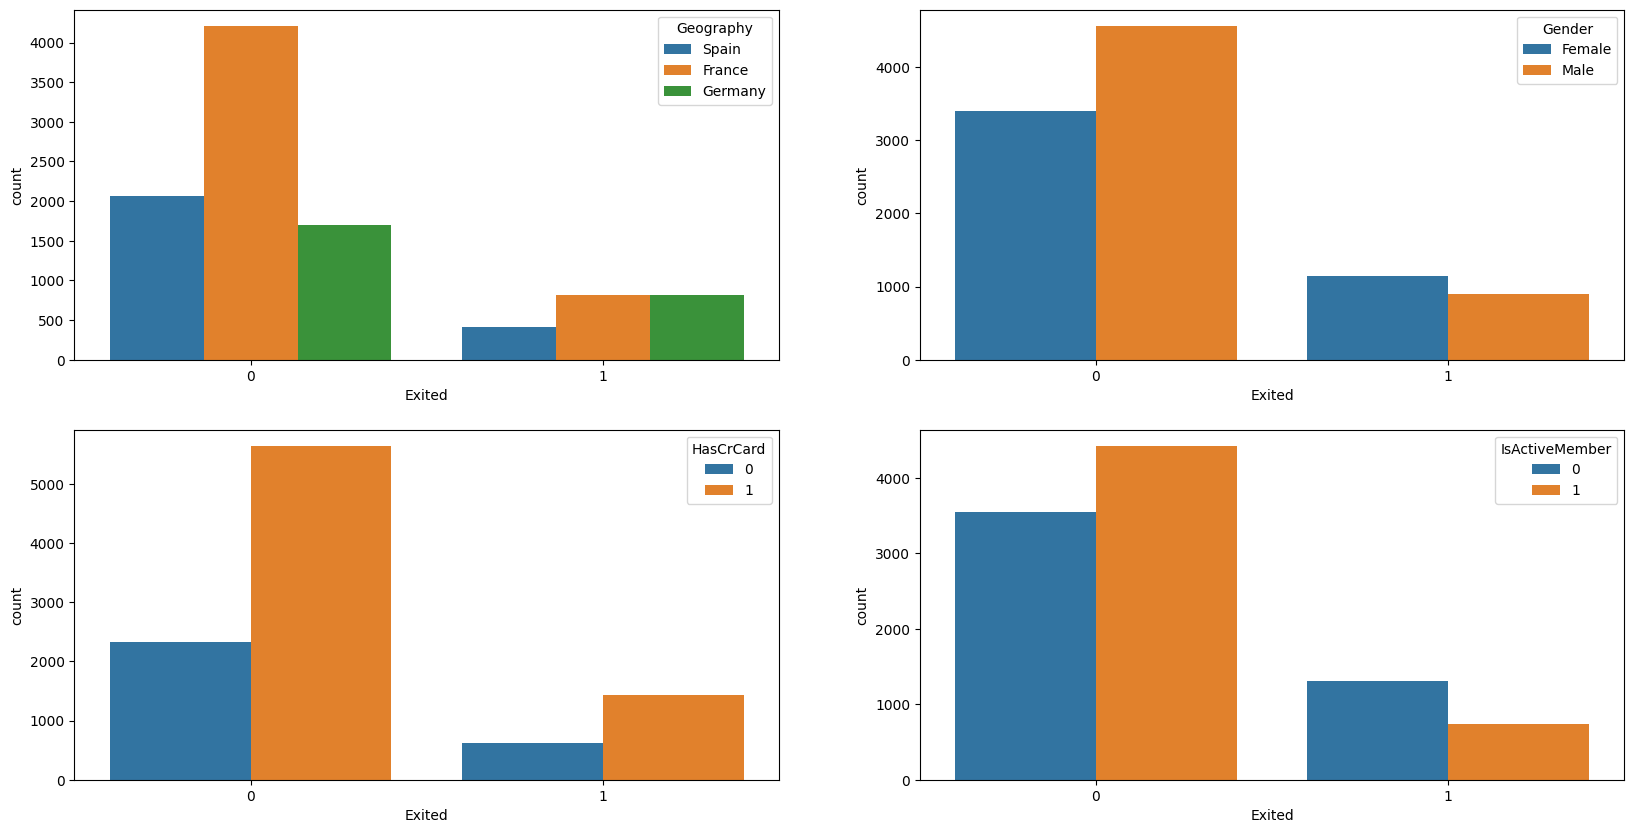

In [ ]:
# Explore categorical features
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=axss[1][1])

# Part 2: Feature Preprocessing

In [ ]:
# Separate X and y
# Select features
y = df['Exited']
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = df.drop(to_drop, axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
# Separate numerical columns and categorical features
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')].difference(['HasCrCard', 'IsActiveMember'])

In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
# Split data into traning set and tesing set
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=1) #stratified sampling 分层抽样，按y不同分类的比例抽样；random_state = 1 保留seed

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4256,596,Spain,Female,76,9,134208.25,1,1,1,13455.43
9151,614,France,Male,49,1,0.00,2,1,0,192440.54
696,445,Spain,Male,62,1,64119.38,1,1,1,76569.64
4898,544,France,Female,40,7,0.00,1,0,1,161076.92
6427,746,France,Male,37,2,0.00,2,1,0,143194.05


In [ ]:
# Scale numerical features
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4256,-0.556600,Spain,Female,3.516577,1.380964,0.925750,-0.914333,1,1,-1.505216
9151,-0.370472,France,Male,0.956282,-1.376312,-1.219862,0.797901,1,0,1.614655
696,-2.118010,Spain,Male,2.189016,-1.376312,-0.194773,-0.914333,1,1,-0.405078
4898,-1.094304,France,Female,0.102850,0.691645,-1.219862,-0.914333,0,1,1.067959
6427,0.994469,France,Male,-0.181627,-1.031652,-1.219862,0.797901,1,0,0.756245


In [ ]:
# Encode categorical features
# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [ ]:
# Encode categorical features
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [ ]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.556600,0.0,3.516577,1.380964,0.925750,-0.914333,1,1,-1.505216,0.0,0.0,1.0
1,-0.370472,1.0,0.956282,-1.376312,-1.219862,0.797901,1,0,1.614655,1.0,0.0,0.0
2,-2.118010,1.0,2.189016,-1.376312,-0.194773,-0.914333,1,1,-0.405078,0.0,0.0,1.0
3,-1.094304,0.0,0.102850,0.691645,-1.219862,-0.914333,0,1,1.067959,1.0,0.0,0.0
4,0.994469,1.0,-0.181627,-1.031652,-1.219862,0.797901,1,0,0.756245,1.0,0.0,0.0


# Part 3: Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Grid Search Cross Validation
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(gs):
  print (f"Best score: {gs.best_score_}")
  print ("Best parameters set:")
  best_parameters = gs.best_params_
  for param_name in sorted(best_parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

### Part 3.1: Logistic regression

In [ ]:
# Grid search cross validation for logistic regression
parameters = {
    'penalty':('l1', 'l2'),
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}

Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear', random_state=1), parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=1, solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [ ]:
# Optimal hyperparameters for logistic regression
print_grid_search_metrics(Grid_LR)

Best score: 0.812375
Best parameters set:
C: 0.2
penalty: l1


In [ ]:
# Optimal model score for logistic regression
optimal_LR_model = Grid_LR.best_estimator_
optimal_LR_model.score(X_test, y_test)

0.812

### Part 3.2: KNN

In [ ]:
# Grid search cross validation for KNN
parameters = {
    'n_neighbors':[1, 3, 5, 7, 9, 11, 13, 15]
}

Grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]})

In [ ]:
# Optimal hyperparameters for KNN
print_grid_search_metrics(Grid_KNN)

Best score: 0.84475
Best parameters set:
n_neighbors: 13


In [ ]:
# Optimal model score for KNN
optimal_KNN_model = Grid_KNN.best_estimator_
optimal_KNN_model.score(X_test, y_test)

0.842

### Part 3.3: Random forest

In [ ]:
# Grid search cross validation for random forest
parameters = {
    'n_estimators' : [50, 70, 90],
    'max_depth': [5, 10, 15]
}

Grid_RF = GridSearchCV(RandomForestClassifier(random_state=1), parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 70, 90]})

In [ ]:
# Optimal hyperparameters for random forest
print_grid_search_metrics(Grid_RF)

Best score: 0.862125
Best parameters set:
max_depth: 10
n_estimators: 70


In [ ]:
# Optimal model score for random forest
optimal_RF_model = Grid_RF.best_estimator_
optimal_RF_model.score(X_test, y_test)

0.864

# Part 4: Result Evaluation

### Part 4.1: Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Print accuracy, precision, recall
def cm_evaluation(classifier, cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy  = (tp + tn) / (tp + fp + fn + tn)
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  f1 = 2 * precision * recall / (precision + recall)
  print(classifier)
  print(f"Accuracy is: {accuracy:.3f}")
  print(f"Precision is: {precision:.3f}")
  print(f"Recall is: {recall:.3f}")
  print(f"F1 score is: {f1:.3f}\n")

In [ ]:
confusion_matrices = [
    ("Logistic regression", confusion_matrix(y_test,optimal_LR_model.predict(X_test))),
    ("KNN", confusion_matrix(y_test, optimal_KNN_model.predict(X_test))),
    ("Random forest", confusion_matrix(y_test,optimal_RF_model.predict(X_test)))
]

for cm in confusion_matrices:
  cm_evaluation(cm[0], cm[1])

Logistic regression
Accuracy is: 0.812
Precision is: 0.618
Recall is: 0.199
F1 score is: 0.301

KNN
Accuracy is: 0.842
Precision is: 0.699
Recall is: 0.393
F1 score is: 0.503

Random forest
Accuracy is: 0.864
Precision is: 0.826
Recall is: 0.420
F1 score is: 0.557



### Part 4.2: AUC score

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Probability results of Random Forest
y_pred_lr = optimal_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

# Probability results of Random Forest
y_pred_knn = optimal_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

# Probability results of Random Forest
y_pred_rf = optimal_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [ ]:
# Print AUC scores
auc_scores = [
    ("Logistic regression", metrics.auc(fpr_lr,tpr_lr)),
    ("KNN", metrics.auc(fpr_knn,tpr_knn)),
    ("Random forest", metrics.auc(fpr_rf,tpr_rf))
]

for auc in auc_scores:
  print(auc[0])
  print(f"AUC score is: {auc[1]:.3f}\n")

Logistic regression
AUC score is: 0.778

KNN
AUC score is: 0.810

Random forest
AUC score is: 0.855



array([[0.94493431, 0.05506569],
       [0.93098346, 0.06901654],
       [0.80065196, 0.19934804],
       [0.68986666, 0.31013334],
       [0.44978965, 0.55021035],
       [0.55708633, 0.44291367],
       [0.93940544, 0.06059456],
       [0.96400271, 0.03599729],
       [0.88608155, 0.11391845],
       [0.91008262, 0.08991738]])

### Part 4.3: Feature importance - random forest

In [ ]:
# Get feature importance of logistic regression
importances = optimal_LR_model.coef_[0]
indices = np.argsort(np.abs(importances))[::-1]
print("Feature importance ranking by logic regression Model:")
for i in range(X_train.shape[1]):
  print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]:.3f}")

Feature importance ranking by logic regression Model:
IsActiveMember: -1.043
Age: 0.743
Geography_Germany: 0.682
Gender: -0.514
Balance: 0.136
Geography_France: -0.101
CreditScore: -0.054
NumOfProducts: -0.053
Tenure: -0.034
HasCrCard: -0.026
EstimatedSalary: 0.023
Geography_Spain: -0.016


In [ ]:
# Get feature importance of random forest
importances = optimal_RF_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importance ranking by random forest model:")
for i in range(X_train.shape[1]):
  print(f"{X_train.columns[indices[i]]}: {importances[indices[i]]:.3f}")

Feature importance ranking by random forest model:
Age: 0.305
NumOfProducts: 0.222
Balance: 0.111
CreditScore: 0.085
EstimatedSalary: 0.082
IsActiveMember: 0.061
Tenure: 0.046
Geography_Germany: 0.035
Gender: 0.019
Geography_France: 0.015
HasCrCard: 0.010
Geography_Spain: 0.010
